In [96]:
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt


dataset = fetch_openml("hill-valley", version=1)
X, y = dataset.data, dataset.target

print(dataset.DESCR)

**Author**: Lee Graham, Franz Oppacher  
**Source**: [UCI](http://archive.ics.uci.edu/ml/datasets/hill-valley)  
**Please cite**:   

Each record represents 100 points on a two-dimensional graph. When plotted in order (from 1 through 100) as the Y coordinate, the points will create either a Hill (a “bump” in the terrain) or a Valley (a “dip” in the terrain). 
See the original source for some examples of these graphs. 

In the original form, there are six files. This is the non-noisy version, with training and test sets merged. 

### Attribute Information:

1-100: Labeled “X##”. Floating point values (numeric), the Y-values of the graphs.  
101: Labeled “class”. Binary {0, 1} representing {valley, hill}

Downloaded from openml.org.


In [97]:
print(dataset.details)
print("Before split, num of rows was", len(X))

{'id': '1479', 'name': 'hill-valley', 'version': '1', 'description_version': '1', 'format': 'ARFF', 'upload_date': '2015-05-22T21:11:58', 'licence': 'Public', 'url': 'https://openml.org/data/v1/download/1590101/hill-valley.arff', 'parquet_url': 'https://data.openml.org/datasets/0000/1479/dataset_1479.pq', 'file_id': '1590101', 'default_target_attribute': 'Class', 'tag': ['artificial', 'Data Science', 'OpenML100', 'study_123', 'study_135', 'study_14', 'study_190', 'study_50', 'study_52', 'study_7'], 'visibility': 'public', 'status': 'active', 'processing_date': '2018-10-03 21:38:13', 'md5_checksum': '347b591c7006712869fcae81a88dc0db'}
Before split, num of rows was 1212


In [98]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
0,39.02,36.49,38.20,38.85,39.38,39.74,37.02,39.53,38.81,38.79,...,37.57,36.62,36.92,38.80,38.52,38.07,36.73,39.46,37.50,39.10
1,1.83,1.71,1.77,1.77,1.68,1.78,1.80,1.70,1.75,1.78,...,1.71,1.80,1.79,1.77,1.74,1.74,1.80,1.78,1.75,1.69
2,68177.69,66138.42,72981.88,74304.33,67549.66,69367.34,69169.41,73268.61,74465.84,72503.37,...,69384.71,73438.88,71053.35,71112.62,74916.48,72571.58,66348.97,71063.72,67404.27,74920.24
3,44889.06,39191.86,40728.46,38576.36,45876.06,47034.00,46611.43,37668.32,40980.89,38466.15,...,47653.60,42625.67,40684.20,46960.73,44546.80,45410.53,47139.44,43095.68,40888.34,39615.19
4,5.70,5.40,5.28,5.38,5.27,5.61,6.00,5.38,5.34,5.87,...,5.52,5.17,5.67,5.60,5.94,5.73,5.22,5.30,5.73,5.91


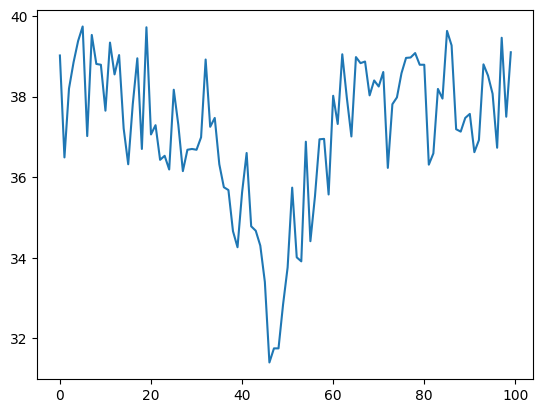

In [99]:
first_row = X.iloc[[0]].to_numpy()[0] # 100 features
x_axis = np.arange(0, 100, 1)

plt.plot(x_axis, first_row)
plt.show()



In [100]:
first_target = y.iloc[0]
print(first_target)

0


In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

print(len(X_train))
print(len(X_train)/len(X) * 100, len(X_test)/len(X) * 100)



909
75.0 25.0


In [102]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler().fit(X_train)
X_scaled = scalar.transform(X_train)

classifier = LogisticRegression()
classifier.fit(X_scaled, y_train)

score = classifier.score(X_scaled, y_train)
print(score)

0.724972497249725


In [103]:
first_test = X_test.iloc[[0]]
expected = y_test.iloc[0]

print(expected)
classifier.predict(first_test)

0


/home/osi/ml-workspace/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array(['0'], dtype=object)